# Multiclass Classification

In [1]:
from IPython.display import Image

In [2]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from scipy.io import loadmat
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#To read the matlab matrix in Python
data = loadmat('ex3data1.mat')
data


{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [4]:
X=data['X']
y=data['y']
print('The dimension of the matrices X and Y are',X.shape,'and',y.shape,'respectively.')
print('The number of unique values in y are:',np.unique(y))


The dimension of the matrices X and Y are (5000, 400) and (5000, 1) respectively.
The number of unique values in y are: [ 1  2  3  4  5  6  7  8  9 10]


In [5]:

y=np.where(y==10,0,y)

The label is 0


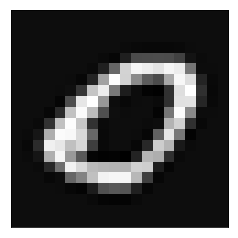

In [6]:
plt.imshow(X[0].reshape(20,20),cmap='gray')
plt.xticks([])
plt.yticks([])
print('The label is',y[0][0])

In [7]:
X=np.hstack((np.ones((X.shape[0],1)),X))
theta=np.zeros(X.shape[1]) 

In [8]:
def SIGMOID(z):
    #Using np.exp is beneficial as it does the operation in a vectorised manner
    return(1/(1+np.exp(-z)))

In [9]:
def COSTREG(theta,X,y,lam):
    m=X.shape[0]
    n=X.shape[1]
    theta=theta.reshape(n,1)
    hypothesis=SIGMOID(np.dot(X,theta))
    J=(-1/m)*((np.dot(np.transpose(y),np.log(hypothesis)))+
              (np.dot((1-np.transpose(y)),np.log(1-hypothesis))))+(lam/(2*m))*np.sum(np.square(theta[1:]))
    return(J.flatten()[0])

In [10]:
def GRADREG(theta,X,y,lam):
    m=X.shape[0]
    n=X.shape[1]
    theta=theta.reshape(n,1)
    hypothesis=SIGMOID(np.dot(X,theta))
    grad=(1/m)*(np.dot(np.transpose(X),(hypothesis-y)))+np.insert((lam/m)*(theta[1:]),0,0).reshape(n,1)
    return(grad.flatten())

In [12]:
import scipy.optimize as opt


In [13]:
def onevsall(X,y,k,theta,lam):
    m=X.shape[0]
    n=X.shape[1]
    thetas=[]
    for i in range(k):
        final_theta=opt.fmin_tnc(func=COSTREG, x0=theta, fprime=GRADREG, args=(X,np.where(y==i,1,0),lam))[0]
        thetas.append(final_theta)
    thetas=np.array(thetas).T
    return(thetas)

In [15]:
thetas=onevsall(X,y,10,theta,0.1)

In [16]:
def pred_multiclass(thetas,X):
    predictions=SIGMOID(np.dot(X,thetas))
    final_pred=np.argmax(predictions,axis=1)
    return(final_pred)

In [17]:
print('The accuracy of the classifier is',np.mean(pred_multiclass(thetas,X)==y.flatten())*100,'%')

The accuracy of the classifier is 96.46000000000001 %


# Neural Network


In [18]:
X=data['X']
y=data['y']
print('The dimension of the matrices X and Y are',X.shape,'and',y.shape,'respectively.')
print('The number of unique values in y are:',np.unique(y))

The dimension of the matrices X and Y are (5000, 400) and (5000, 1) respectively.
The number of unique values in y are: [ 1  2  3  4  5  6  7  8  9 10]


In [19]:
#To load the MATLAB file onto Python
weights = loadmat('ex3weights.mat')
Theta1=weights['Theta1']
Theta2=weights['Theta2']

In [20]:
print('The dimensions of Theta1 and Theta2 are',Theta1.shape,'and',Theta2.shape,'respectively.')

The dimensions of Theta1 and Theta2 are (25, 401) and (10, 26) respectively.


In [21]:
def predict_nn(X,Theta1,Theta2):
    m=X.shape[0]
    a1=np.hstack((np.ones((m,1)),X))
    z2=np.dot(a1,Theta1.T)
    a2=SIGMOID(z2)
    a2=np.hstack((np.ones((m,1)),a2))
    z3=np.dot(a2,Theta2.T)
    a3=SIGMOID(z3)
    predictions=np.argmax(a3,axis=1)+1
    return(predictions)

In [22]:
print('The accuracy of the classifier is',np.mean(predict_nn(X,Theta1,Theta2)==y.flatten())*100,'%')

The accuracy of the classifier is 97.52 %
